(1, 1)
(0, 2)
(1, 2)
(1, 1)
(1, 1)
(0, 1)
(0, 2)
(0, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(2, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(2, 1)
(2, 1)
(1, 1)
(1, 2)
(1, 1)
(1, 1)
(0, 1)
(0, 2)
(1, 1)
(1, 1)
(1, 0)
(1, 0)
(2, 1)
(1, 1)
(0, 2)
(0, 1)
(0, 1)
(2, 1)
(0, 2)
(1, 0)
(2, 1)
(1, 2)
(2, 1)
(2, 1)
(1, 1)
(1, 2)
(1, 2)
(0, 1)
(1, 1)
(1, 1)
(2, 0)
(2, 0)
(1, 0)
(2, 1)
(2, 2)
(1, 1)
(1, 0)
(1, 1)
(1, 0)
(2, 2)
(1, 2)
(0, 1)
(0, 1)
(1, 0)
(2, 1)
(0, 1)
(2, 0)
(2, 1)
(1, 0)
(1, 2)
(1, 2)
(0, 2)
(2, 1)
(1, 2)
(2, 1)
(1, 0)
(1, 0)
(0, 1)
(2, 2)
(2, 0)
(1, 0)
(1, 1)
(1, 2)
(2, 1)
(1, 1)
(2, 1)
(1, 2)
(1, 0)
(2, 2)
(2, 0)
(0, 2)
(0, 1)
(2, 0)
(1, 2)
(0, 1)
(2, 1)
(2, 2)
(1, 2)
(1, 0)


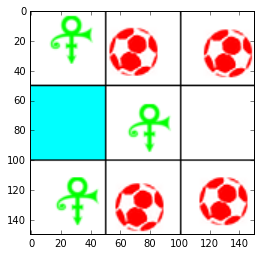

In [116]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

values = [
    slice(0, 50, None),
    slice(51, 100, None),
    slice(101, 150, None)
]

slices = [
    [[values[0], values[0]],
    [values[0], values[1]],
    [values[0], values[2]]],
    
    [[values[1], values[0]],
    [values[1], values[1]],
    [values[1], values[2]]],
    
    [[values[2], values[0]],     
    [values[2], values[1]],
    [values[2], values[2]]]
]

white = np.array([0, 'w'])

def getColor(field):
    for row in field:
        for col in row:
            for i in range(3):
                if (col[i] < 255):
                    if (col[0] == 255):
                        return 'r'
                    if (col[1] == 255):
                        return 'g'
                    if (col[2] == 255):
                        return 'b'
    return 'w'

def getPopulation(field):
    population = 0
    for row in field:
        for col in row:
            for i in range(3):
                if (col[i] < 255):
                    population += 1
    return population

def determineTokenPositions(pixels, board):    
    for x in range(len(slices)):
        for y in range(len(slices[0])):
            population = getPopulation(pixels[slices[x][y]])
            color = getColor(pixels[slices[x][y]])
            values = np.array([int(population), color])
            board[x][y] = values
            
def determinePlayers(board, player):  
    for row in board:
        for cell in row:
            if(int(cell[0]) > 0 and int(player[0][0]) == -1):  
                player[0] = cell
                
            elif(int(cell[0]) > 0 and not np.array_equal(cell, player[0])):
                player[1] = cell
                
def determineNextPlayer(board, player):
    player0Count = 0
    player1Count = 0
    for row in board:
        for cell in row:
            if (np.array_equal(cell, player[0])):
                player0Count += 1
            elif (np.array_equal(cell, player[1])):
                player1Count += 1
    if (player1Count < player0Count):
        s,t = player[0]
        player[0] = player[1]
        player[1] = np.array([s,t])
        
def checkIfPlayer0Won(board, player):    
    for row in board:
        rowCount = 0
        for cell in row:
            if (np.array_equal(cell, player[0])):
                rowCount +=1
            if (rowCount == 3):
                return True;
    for col in board.swapaxes(0,1):
        colCount = 0
        for cell in col:
            if (np.array_equal(cell, player[0])):
                colCount +=1
            if (colCount == 3):
                return True;
    if (np.array_equal(player[0], board[0][0]) and np.array_equal(player[0], board[1][1]) and np.array_equal(player[0], board[2][2])):
        return True
    if (np.array_equal(player[0], board[0][2]) and np.array_equal(player[0], board[1][1]) and np.array_equal(player[0], board[2][0])):
        return True
    return False

def tryEmptySpaces(board, player):
    for x in range(len(board)):
        for y in range(len(board)):
            if(np.array_equal(board[x][y],white)):
                board[x][y] = player[0]
                if (checkIfPlayer0Won(board, player)):
                    return (x,y)
                else:
                    board[x][y] = white

def solve(path):
    pic = Image.open(path)
    pixels = np.array(pic)
    
    player = np.array([
        np.array([-1, '']),
        np.array([-1, ''])
    ])
    
    board = np.array([
        [white,white,white],
        [white,white,white],
        [white,white,white]
    ])
    
    determineTokenPositions(pixels, board)
    determinePlayers(board, player)
    determineNextPlayer(board, player)
    solution = tryEmptySpaces(board, player)
    pixels[slices[solution[0]][solution[1]]] = (0,255,255,255)
    plt.imshow(pixels, cmap=cm.gray, vmin=0, vmax=255) 
    print(solution)    
    return Image.fromarray(pixels)

def solveAll(folder):
    for file in os.listdir(folder):
        if (len(file) == 7):
            solvedPic = solve(folder + file)
            solvedPic.save(folder + file[:3] + "_solved.png")
    
solveAll("c:/Users/Matze/projects/JupyterNotebooks/tic/")
    
#solve("c:/Users/Matze/projects/JupyterNotebooks/tic/021.png")
